In [1]:
import os
from os import listdir, path
import random
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

Le but de cette deepfake est de transposer le visage de la personne 2 sur la vidéo de la personne 1.

In [2]:
path_P1 = "./data/romeo/"
path_P2 = "./data/lomepal/"

In [3]:
def show(image):
    plt.imshow(np.squeeze(image.astype("uint8")), cmap="gray")
    plt.title("image shape: "+ str(image.shape), fontsize=14)
    plt.axis('off');
    
def show_multiple(images, figsize):
    fig, ax = plt.subplots(ncols=len(images), figsize=figsize)
    for col, image in zip(ax, images):
        col.imshow(np.squeeze(image.astype("uint8")), cmap="gray")
        col.set_title("image shape: "+ str(image.shape), fontsize=14)
    plt.tight_layout()
    plt.axis('off');

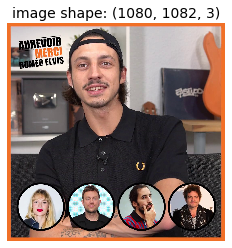

In [4]:
show(imread(path_P1+"frame3900.jpg"))

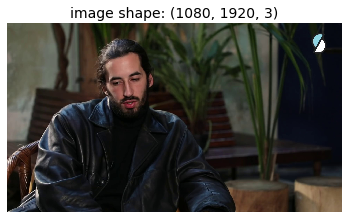

In [5]:
show(imread(path_P2+"frame27600.jpg"))

Comme vous pouvez le constater, nous avons choisi de prendre des personnes au teint de peau et visages similaires afin d'optimiser la qualité de la deepfake finale.

# Construction de l'Autoencoder

keras: https://blog.keras.io/building-autoencoders-in-keras.html <br>
DataCamp: https://www.datacamp.com/community/tutorials/autoencoder-keras-tutorial

In [6]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


### Autoencoder P1

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.3576 - val_loss: 0.2719
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2657 - val_loss: 0.2561
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2455 - val_loss: 0.2324
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2234 - val_loss: 0.2126
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2070 - val_loss: 0.1993
Epoch 6/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1956 - val_loss: 0.1896
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1870 - val_loss: 0.1820
Epoch 8/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1802 - val_loss: 0.1758
Epoch 9/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1745 - val_loss: 0.1704
Epoch

In [14]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

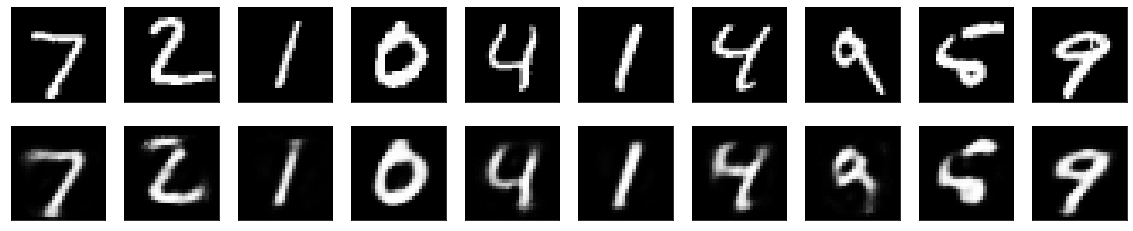

In [15]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
image_size = (1080, 1082, 3)
sample_size = 161

Récupérons toutes les images de notre fichier <br>
Vidéo: https://www.youtube.com/watch?v=9zKuYvjFFS8 <br>
Article medium: https://becominghuman.ai/variational-autoencoders-for-new-fruits-with-keras-and-pytorch-6d0cfc4eeabd

In [17]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob(path_P1 + '*.jpg'): 
    im=Image.open(filename)
    image_list.append(im)

In [18]:
# this is our input layer
img_height=1080
img_width = 1082
nb_channels =3
input_img = Input(shape=(img_height*img_width*nb_channels,))

input_img

<tf.Tensor 'input_3:0' shape=(None, 3505680) dtype=float32>